# Virtual Competition 2- Loan Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read train dataset to Python Environment

In [2]:
train=pd.read_csv("train_ctrUa4K.csv") 

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Perform Exploratory Data Analysis

In [5]:
train.shape

(614, 13)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**from above there 13 variables in train dataset and loan_status is the target variable.**

In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Finding Null Values

In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**from above there are some nullvalues in some features.**

# Filling Null values

In [9]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [10]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [11]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
loanstatus = train["Loan_Status"].value_counts()

# UNIVARIATE ANALYSIS

In [13]:
loanstatus

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: >

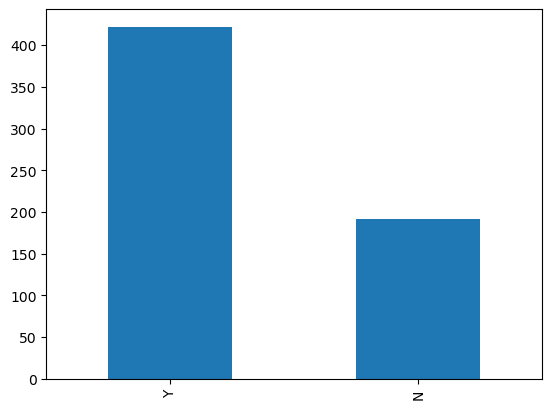

In [14]:
#Target Variable
train['Loan_Status'].value_counts().plot.bar()

In [15]:
#Independent Variables

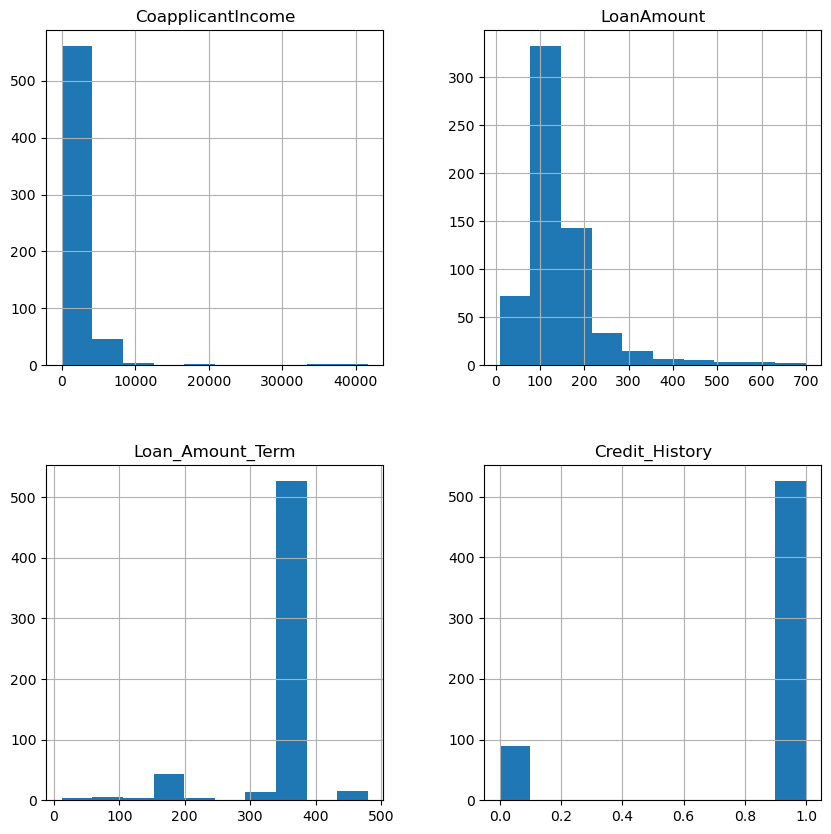

In [16]:
freqdata = train.select_dtypes(include="float64")
freqdata.hist(figsize =(10,10))
plt.show()

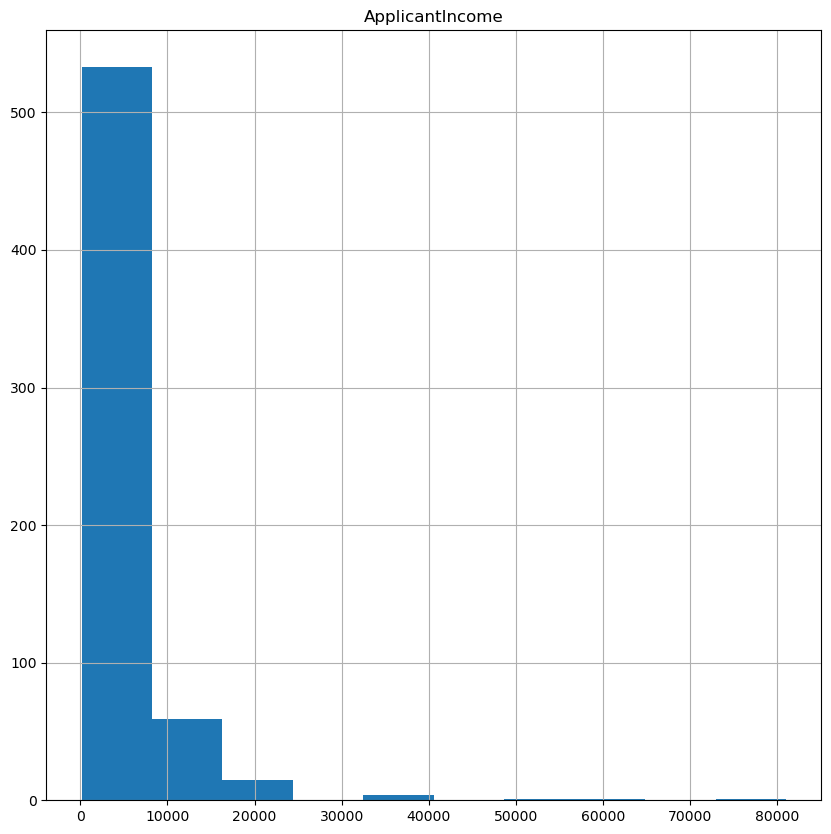

In [17]:
freqdata = train.select_dtypes(include="int64")
freqdata.hist(figsize =(10,10))
plt.show()

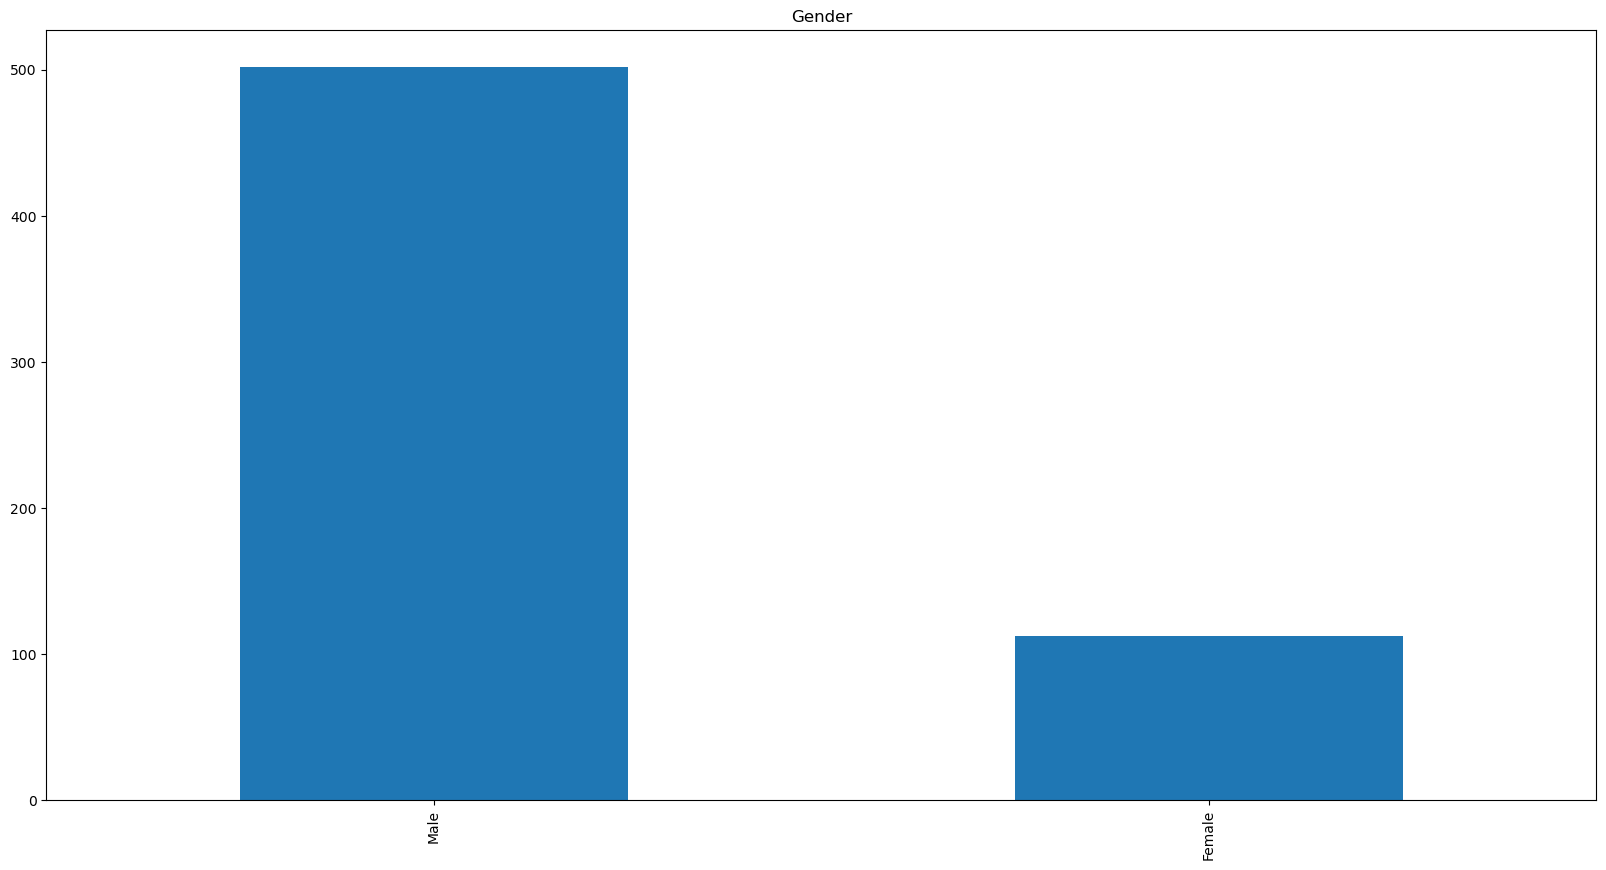

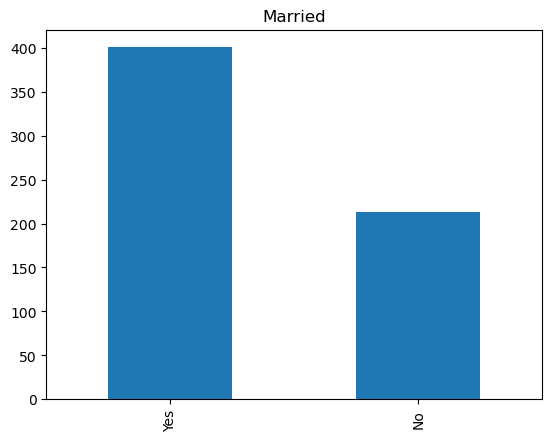

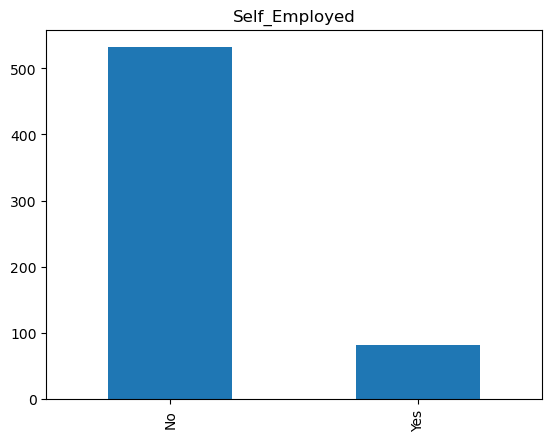

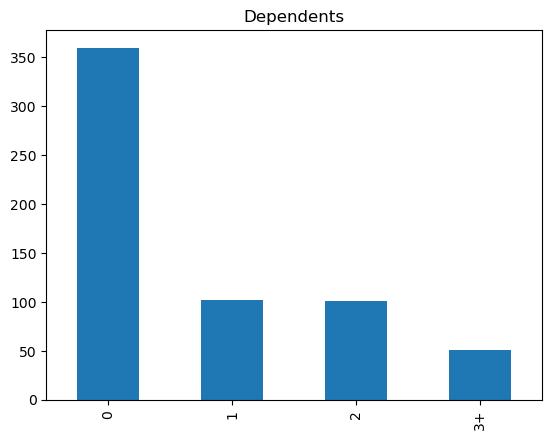

In [18]:

train['Gender'].value_counts().plot.bar(figsize=(20,10), title= 'Gender') 
plt.show()
train['Married'].value_counts().plot.bar(title= 'Married') 
plt.show()
train['Self_Employed'].value_counts().plot.bar(title= 'Self_Employed') 
plt.show()
train['Dependents'].value_counts().plot.bar(title= 'Dependents') 
plt.show()

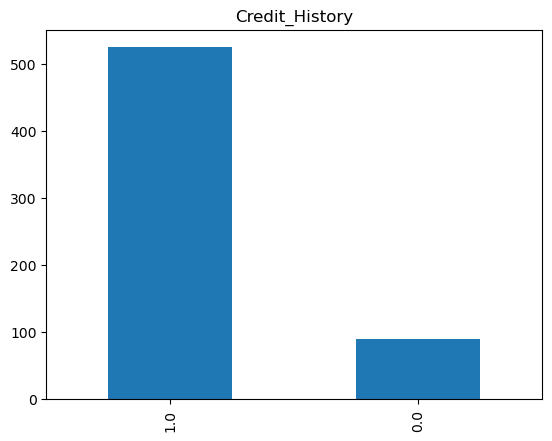

In [19]:

train['Credit_History'].value_counts().plot.bar(title= 'Credit_History') 
plt.show()




# Categorical Independent Variable vs Target Variable

<Axes: xlabel='Gender'>

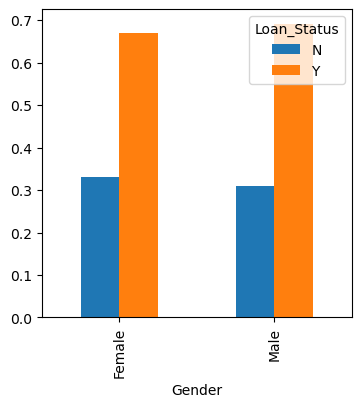

In [20]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

In [21]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])

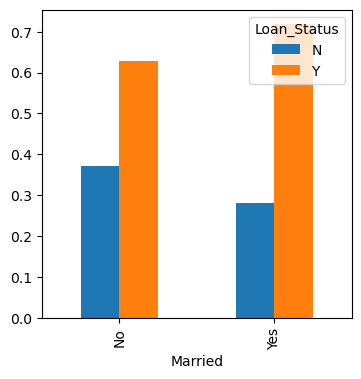

In [22]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show()

In [23]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])

<Axes: xlabel='Dependents'>

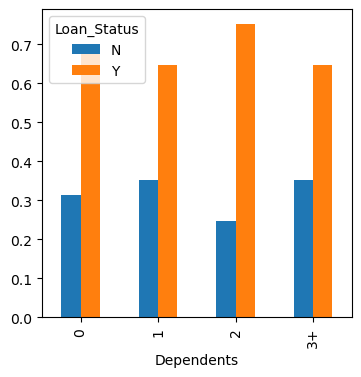

In [24]:
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))

In [25]:
Self_Employed=pd.crosstab(train["Self_Employed"],train["Loan_Status"])

<Axes: xlabel='Self_Employed'>

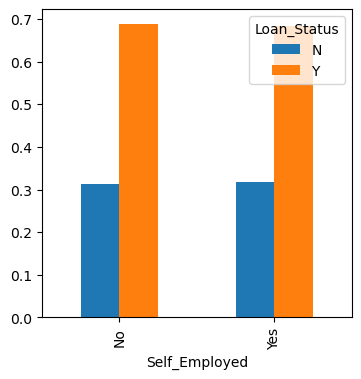

In [26]:
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))

In [27]:
Education=pd.crosstab(train["Education"],train["Loan_Status"])

<Axes: xlabel='Education'>

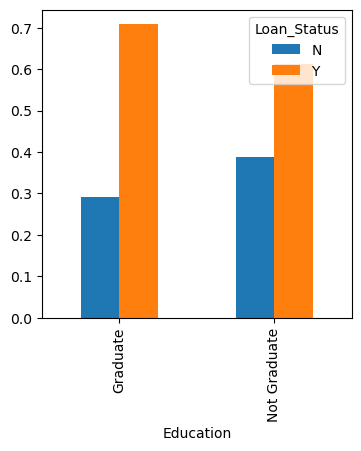

In [28]:

Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))

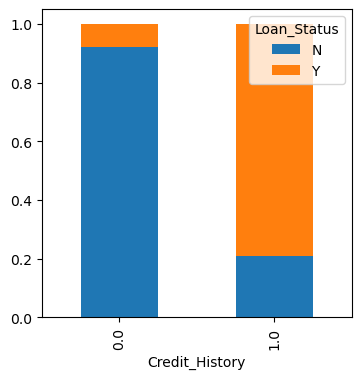

In [29]:


Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 


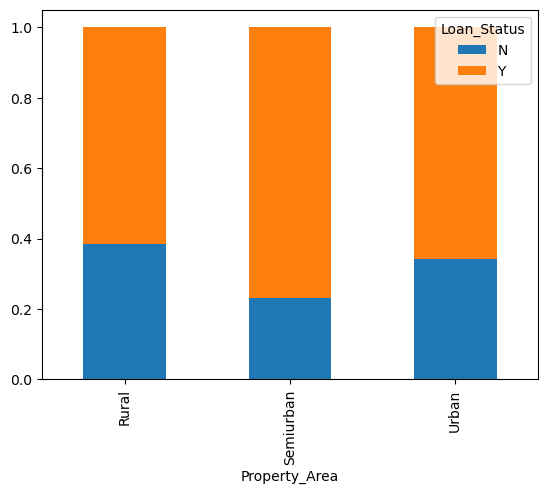

In [30]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

<Axes: xlabel='Loan_Status'>

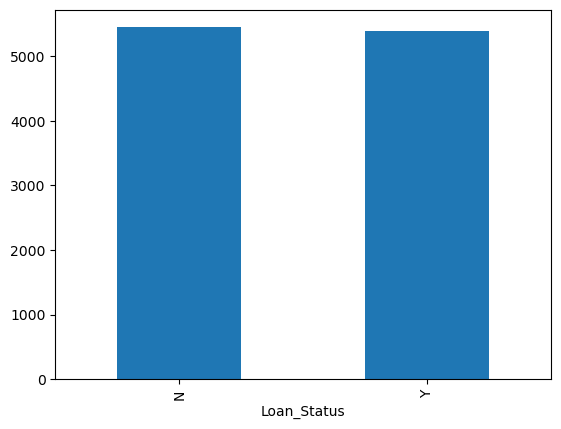

In [31]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

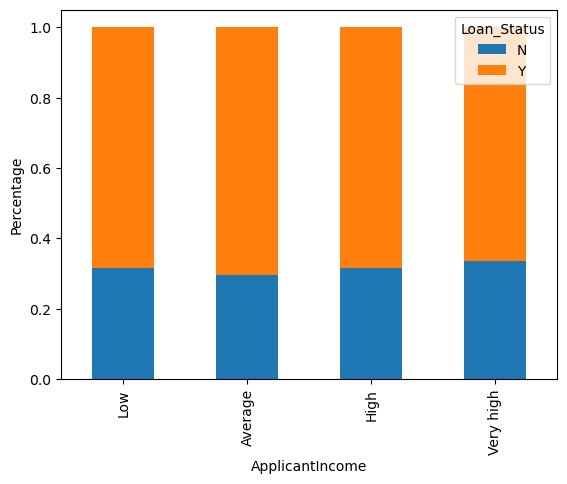

In [32]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

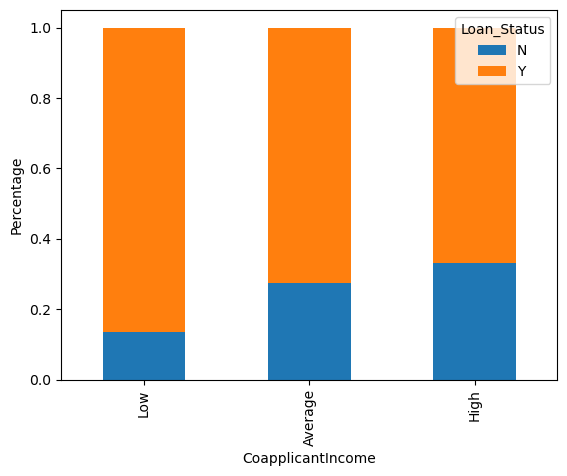

In [33]:

bins=[0,1000,3000,42000]
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

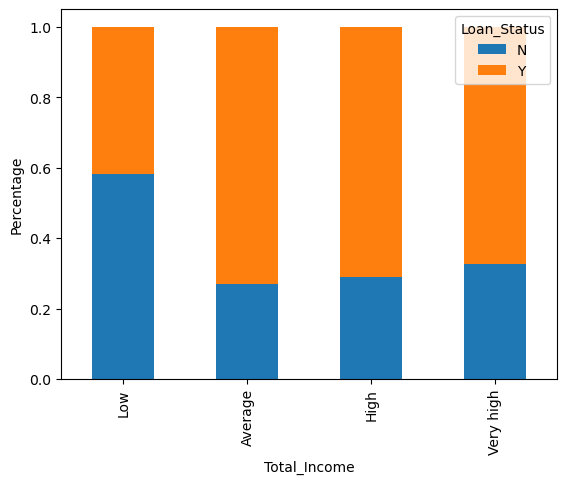

In [34]:

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

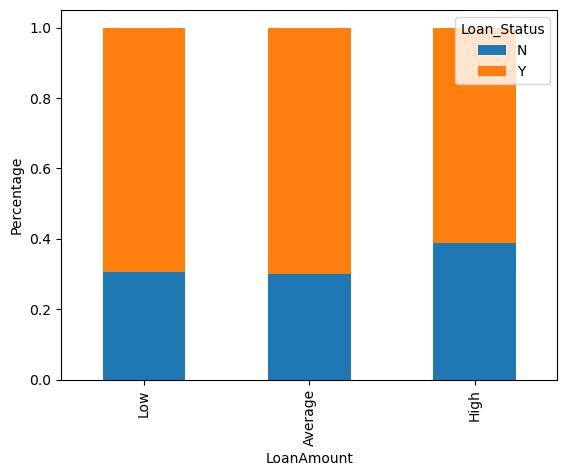

In [35]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [36]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin','LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

C:\Users\skshe\AppData\Local\Temp\ipykernel_12876\1623768116.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot = True,linewidths=0.1,annot_kws={"fontsize":6})


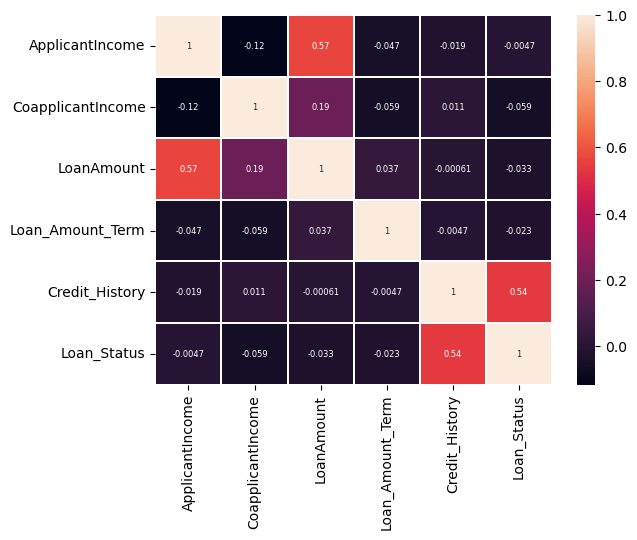

In [37]:
sns.heatmap(train.corr(),annot = True,linewidths=0.1,annot_kws={"fontsize":6})
plt.show()

**We see that the most correlated variables are (ApplicantIncome – LoanAmount) and (Credit_History – Loan_Status). LoanAmount is also correlated with CoapplicantIncome.**

In [38]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

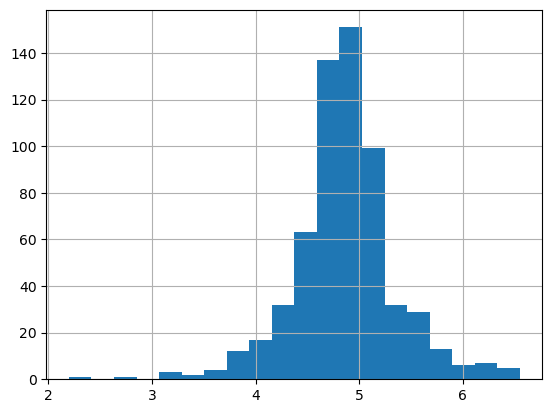

In [39]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)


# Read test dataset to Python Environment

In [40]:
test=pd.read_csv("test_lAUu6dG.csv")


In [41]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [42]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [43]:
test.shape

(367, 12)

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**from above there are 12 variables and here there is no target column.A data set of Loan_Status has to be predicted using the model created from train dataset and the predicted is to fit the output for test dataset.**

In [45]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# finding null values of test dataset

In [46]:
test['Dependents'].replace('3+', 3,inplace=True)

In [47]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# filling the null values of test dataset

In [48]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

In [49]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

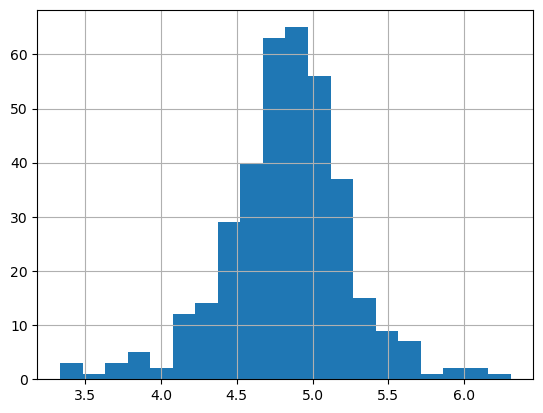

In [50]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

In [51]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [52]:
#Defining independent variables(X) and traget variable(Y)
X = train.drop('Loan_Status',1) 
Y = train.Loan_Status

C:\Users\skshe\AppData\Local\Temp\ipykernel_12876\1928709753.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train.drop('Loan_Status',1)


In [53]:
#performing encoding
X=pd.get_dummies(X)

In [54]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,4.262680,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,3.688879,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,5.533389,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [55]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [56]:
train = pd.get_dummies(train)
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,4.262680,1,0,1,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,3.688879,0,1,0,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,5.533389,0,1,0,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,5.231109,0,1,0,...,0,0,1,1,0,1,0,0,0,1


In [57]:
test =pd.get_dummies(test)
test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,4.727388,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.0,4.744932,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,1.0,4.836282,0,1,1,0,...,1,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.0,5.062595,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0


In [58]:
#Perforig train test and split test in train dataset (80% for training and 20% for testing)
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state=1)

In [60]:
x_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
533,11250,0.0,196.0,360.0,1.0,5.278115,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
544,3017,663.0,102.0,360.0,1.0,4.624973,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
41,1800,1213.0,47.0,360.0,1.0,3.850148,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
148,10000,1666.0,225.0,360.0,1.0,5.416100,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
111,2929,2333.0,139.0,360.0,1.0,4.934474,1,0,0,1,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2378,0.0,46.0,360.0,1.0,3.828641,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
404,7441,0.0,194.0,360.0,1.0,5.267858,1,0,1,0,...,1,0,0,1,0,0,1,1,0,0
247,6608,0.0,137.0,180.0,1.0,4.919981,0,1,0,1,...,0,1,0,0,1,1,0,0,0,1
464,4166,0.0,98.0,360.0,0.0,4.584967,0,1,1,0,...,1,0,0,1,0,1,0,0,1,0


In [61]:
#PERFORMING LOGISTIC REGRESSION

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',dual=False,tol=0.0001, C=1.0,fit_intercept=True,intercept_scaling=1,class_weight=None,random_state=1, solver='liblinear',max_iter=100, multi_class='ovr',verbose=0,warm_start=False,n_jobs=1)

In [63]:
model = lr.fit(x_train,y_train)

In [64]:

y_predictions = model.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [66]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [67]:
confusion_matrix(y_test,y_predictions)

array([[16, 23],
       [ 1, 83]], dtype=int64)

In [68]:
y_predictions

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [69]:
print("accuracy =",accuracy_score(y_test,y_predictions))

accuracy = 0.8048780487804879


In [70]:
print("precision =",precision_score(y_test,y_predictions,average='micro'))

precision = 0.8048780487804879


In [71]:
print("recall_score=",recall_score(y_test,y_predictions,average='micro'))

recall_score= 0.8048780487804879


In [72]:
print("f1_score =",f1_score(y_test,y_predictions,average='micro'))

f1_score = 0.8048780487804877


In [73]:
#STRATIFIED K FOLD CROSS VALIDATION

**To check how robust our model is to unseen data, we can use Validation. Later, you test your model on this sample before finalizing it.

In [74]:
from sklearn.model_selection import StratifiedKFold

sk = StratifiedKFold(n_splits = 10)

In [75]:
for train_index,test_index in sk.split(X,Y):
    print('Training Index',train_index)
    print('Test Index',test_index)

Training Index [ 53  54  57  62  63  64  65  66  69  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
skvc_result = cross_val_score(model,X,Y,cv = sk)

In [78]:
skvc_result

array([0.80645161, 0.82258065, 0.75806452, 0.75806452, 0.78688525,
       0.78688525, 0.86885246, 0.85245902, 0.80327869, 0.83606557])

In [79]:
np.mean(skvc_result)

0.8079587519830775

In [80]:
test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,4.727388,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.0,4.744932,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,1.0,4.836282,0,1,1,0,...,1,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.0,5.062595,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0


In [81]:
pred_test = model.predict(test)

In [82]:
submission =pd.read_csv("sample_submission_49d68Cx.csv")
submission.head()


,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [83]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Loan_ID      367 non-null    object
 1   Loan_Status  367 non-null    object
dtypes: object(2)
memory usage: 5.9+ KB


In [84]:

Z=pd.read_csv("test_lAUu6dG.csv")

In [85]:
Z

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [86]:

submission['Loan_ID']=Z['Loan_ID']
submission['Loan_Status']=pred_test

In [87]:

submission['Loan_Status'].replace(0,'N',inplace=True) 
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [88]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Loan_Pred.csv',index=False)

In [89]:
results=pd.read_csv("Loan_Pred.csv")
results.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# SVM ALGORITHM

In [90]:
from sklearn.svm import SVC

In [91]:
svm_cls= SVC(kernel="rbf")

In [92]:
swm_cls = svm_cls.fit(x_train,y_train)


In [93]:
y_pred_svm = svm_cls.predict(x_test)

In [94]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [95]:
confusion_matrix(y_test,y_pred_svm)

array([[ 0, 39],
       [ 1, 83]], dtype=int64)

In [96]:
accuracy_score(y_test,y_pred_svm)

0.6747967479674797

In [97]:
pred_test1 = svm_cls.predict(test)

In [98]:
submission['Loan_ID']=Z['Loan_ID']
submission['Loan_Status']=pred_test1

In [99]:
submission['Loan_Status'].replace(0,'N',inplace=True) 
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [100]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Loan_Pred1.csv',index=False)

# DECISION TREE CLASSIFIER

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:

dt_cls = DecisionTreeClassifier()

In [103]:
model = dt_cls.fit(x_train,y_train)

In [104]:
y_pred_dt = model.predict(x_test)

In [105]:
confusion_matrix(y_test,y_pred_dt)

array([[25, 14],
       [16, 68]], dtype=int64)

In [106]:
accuracy_score(y_test,y_pred_dt)

0.7560975609756098

In [107]:
pred_test2 = dt_cls.predict(test)

In [108]:
submission['Loan_ID']=Z['Loan_ID']
submission['Loan_Status']=pred_test2

In [109]:
submission['Loan_Status'].replace(0,'N',inplace=True) 
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [110]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Loan_Pred2.csv',index=False)

# RANDOM FOREST CLASSIFIER

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf_cls =RandomForestClassifier()

In [113]:
model_rf = rf_cls.fit(x_train,y_train)

In [114]:
y_pred_rf = model_rf.predict(x_test)

In [115]:
confusion_matrix(y_test,y_pred_rf)

array([[16, 23],
       [ 6, 78]], dtype=int64)

In [116]:
accuracy_score(y_test,y_pred_rf)

0.7642276422764228

In [117]:
pred_test3 = rf_cls.predict(test)

In [118]:
submission['Loan_ID']=Z['Loan_ID']
submission['Loan_Status']=pred_test3

In [119]:
submission['Loan_Status'].replace(0,'N',inplace=True) 
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [120]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Loan_Pred3.csv',index=False)

**from above logistic regression performs well in this dataset with score of 0.77778 in the predicted datadet.**